# **House Price Prediction**

**Loading Data**

In [ ]:
#importing libraries
import pandas as pd

In [ ]:
# uploading files
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
# reading the csv files
train_data= pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [ ]:
# Identify non-numeric columns
non_numeric_cols = train_data.select_dtypes(exclude=['number']).columns

# Remove non-numeric columns
train_data = train_data.drop(columns=non_numeric_cols)

**CORELATION HEATMAP**

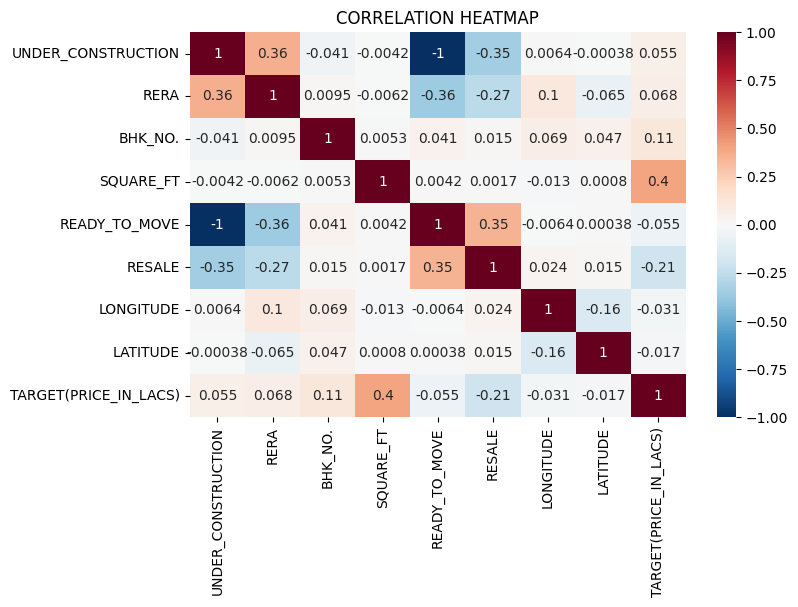

In [ ]:
# plotting the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

cor= train_data.corr()

plt.figure(figsize=(8, 5))
dataplot = sns.heatmap(cor, annot=True, cmap='RdBu_r')
plt.title('CORRELATION HEATMAP')
plt.show()

### **DROPPING ADDRESS FEATURE**

In [ ]:
# dropping the Address feature
train_data.drop(['ADDRESS'],axis=1,inplace=True)
test_data.drop(['ADDRESS'],axis=1,inplace=True)

## **DATA VISUALISATION**

### UNDER_CONSTRUCTION Vs TARGET PRICE

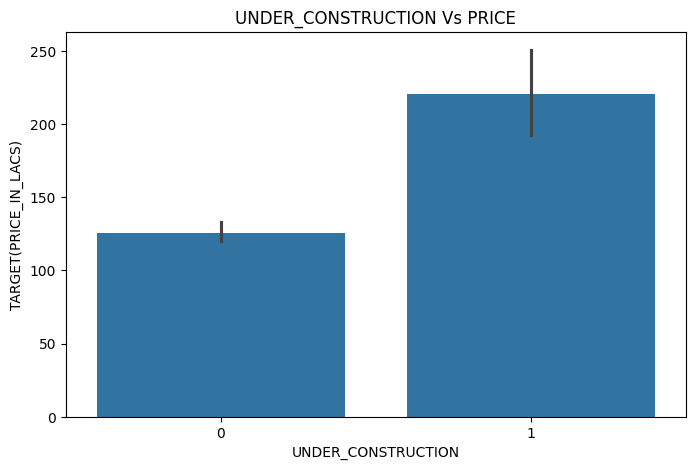

In [ ]:
# plotting under_construction vs Price
plt.figure(figsize=(8, 5))
sns.barplot(x = train_data['UNDER_CONSTRUCTION'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('UNDER_CONSTRUCTION Vs PRICE')
plt.show()

**RESALE Vs TARGET PRICE**

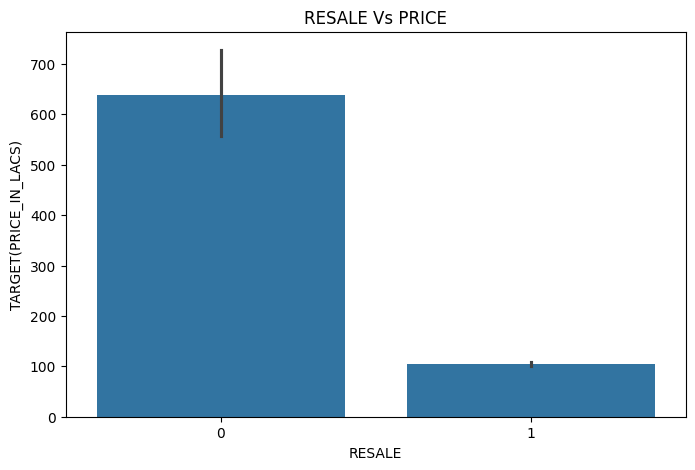

In [ ]:
# plotting resale vs price
plt.figure(figsize=(8, 5))
sns.barplot(x = train_data['RESALE'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('RESALE Vs PRICE')
plt.show()

**BHK_OR_RK Vs TARGET PRICE**

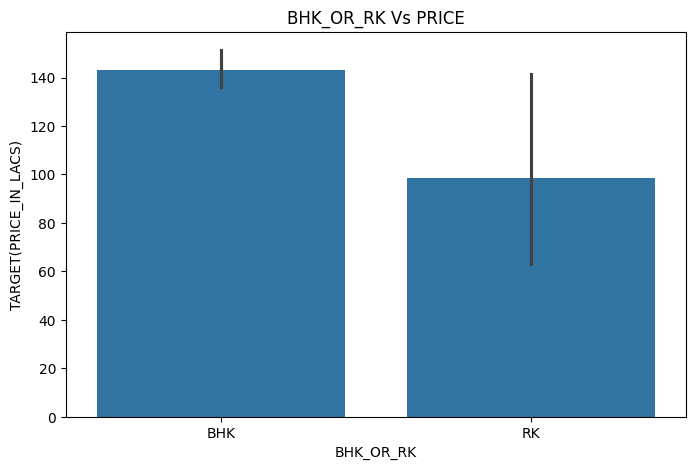

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=test_data['BHK_OR_RK'], y=train_data['TARGET(PRICE_IN_LACS)'])
plt.title('BHK_OR_RK Vs PRICE')
plt.show()


**POSTED_BY Vs TARGET PRICE**

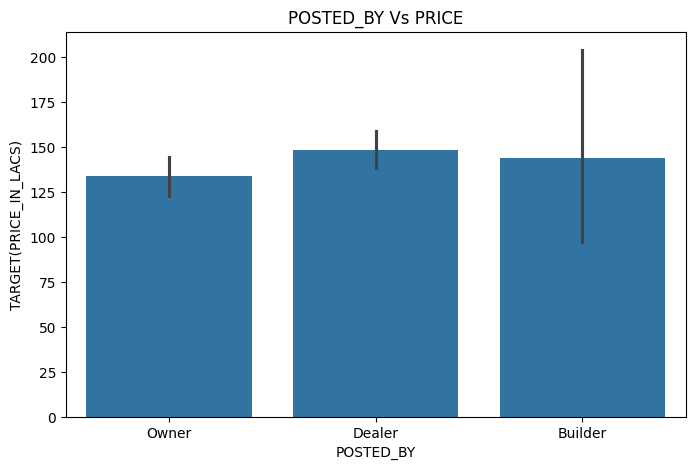

In [ ]:
# plotting posted_by vs price
plt.figure(figsize=(8,5))
sns.barplot(x = test_data['POSTED_BY'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('POSTED_BY Vs PRICE')
plt.show()

In [ ]:
print(train_data.columns)


Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')


In [ ]:
print(test_data.columns)

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')


**BHK_NO. Vs TARGET PRICE**

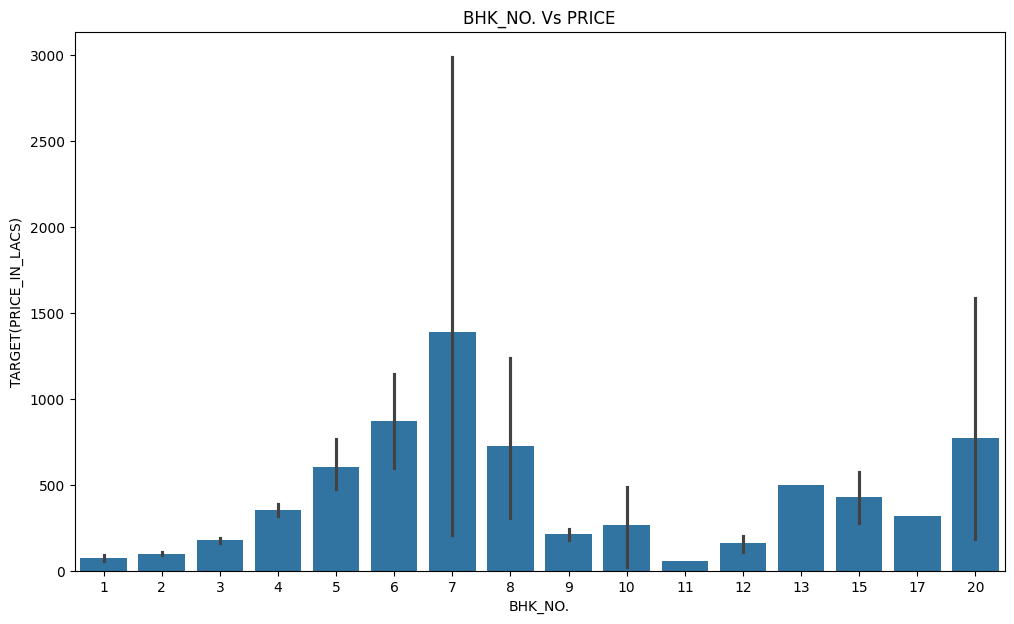

In [ ]:
# plotting BHK_NO vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['BHK_NO.'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('BHK_NO. Vs PRICE')
plt.show()

**SQUARE_FT Vs TARGET FEATURE**

<Figure size 800x1000 with 0 Axes>

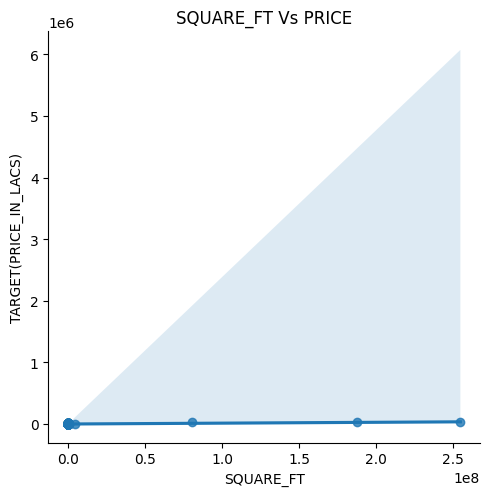

In [ ]:
# plotting Square_feet vs price
plt.figure(figsize=(8,10))
sns.lmplot(x = 'SQUARE_FT', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('SQUARE_FT Vs PRICE')
plt.show()

**LONGITUDE Vs TARGET PRICE**

<Figure size 1200x700 with 0 Axes>

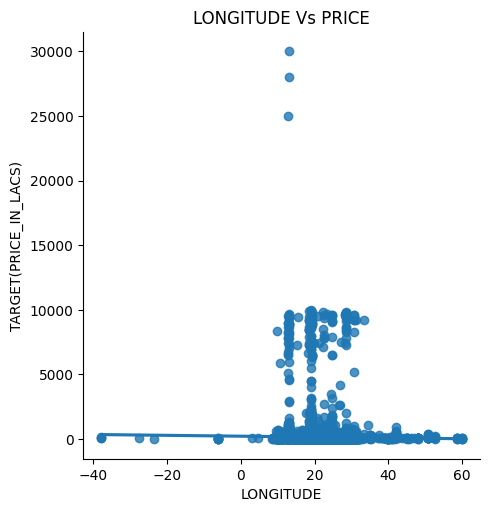

In [ ]:
# plotting longitud vs price
plt.figure(figsize=(12,7))
sns.lmplot(x = 'LONGITUDE', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('LONGITUDE Vs PRICE')
plt.show()

**LATITUDE Vs TARET PRICE**

<Figure size 1200x700 with 0 Axes>

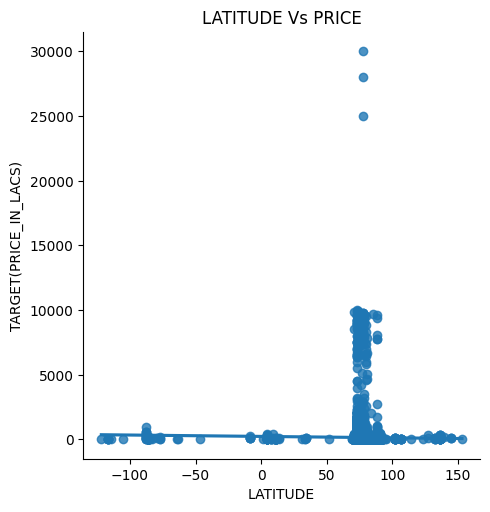

In [ ]:
# plotting latitude vs price
plt.figure(figsize=(12,7))
sns.lmplot(x = 'LATITUDE', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('LATITUDE Vs PRICE')
plt.show()

**CONVERTING CATEGORICAL DATA TO NUMERICAL VALUES**

In [ ]:
# mapping the categorical data to numerical values
test_data['BHK_OR_RK'] = test_data['BHK_OR_RK'].map({'BHK':1, 'RK':1})
test_data['POSTED_BY'] = test_data['POSTED_BY'].map({'Owner':1, 'Dealer':2, 'Builder':3})

test_data['POSTED_BY'] = test_data['POSTED_BY'].map({'Owner':1, 'Dealer':2, 'Builder':3})
test_data['BHK_OR_RK'] = test_data['BHK_OR_RK'].map({'BHK':1, 'RK':1})

In [ ]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


**TRAIN VALIDATION SPLIT**

In [ ]:
# spliting features and label

Y = train_data['TARGET(PRICE_IN_LACS)']
train_data.drop(['TARGET(PRICE_IN_LACS)'], axis=1, inplace=True)

In [ ]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)

print('Training features shape:', x_train.shape)
print('Validation features shape:', x_val.shape)

Training features shape: (26505, 11)
Validation features shape: (2946, 11)


# **MODEL SELECTION**

## **LINEAR REGRESSION**

In [ ]:
# creating a dictionary to store the score of models
models = dict()

In [ ]:
#importing LinearRegression
from sklearn.linear_model import LinearRegression

# fitting the model
lin_reg = LinearRegression()
print(lin_reg)
lin_reg.fit(x_train, y_train)

# Evaluvating the score of the model
print("Score on training data:", lin_reg.score(x_train,y_train))
print("Score on validation data:", lin_reg.score(x_val,y_val))

LinearRegression()
Score on training data: 0.15767211697634154
Score on validation data: 0.5077537390547431


In [ ]:
models['lin_reg'] = lin_reg.score(x_val,y_val)

## **DECISION TREE REGRESSOR**

In [ ]:
# importing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# fitting the model
tree = DecisionTreeRegressor()
print(tree)
tree.fit(x_train, y_train)

# Evaluvating the score of the model
print("Score on training data:", tree.score(x_train,y_train))
print("Score on validation data:", tree.score(x_val,y_val))

DecisionTreeRegressor()
Score on training data: 0.9999585622230275
Score on validation data: 0.7211721612219506


In [ ]:
models['tree'] = tree.score(x_val,y_val)

## **RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor with a valid max_features value (e.g., 'sqrt')
forest = RandomForestRegressor(n_estimators=50, max_features='sqrt')
print(forest)
# Fit the model
forest.fit(x_train, y_train)

# Evaluate the model
print("Score on training data:", forest.score(x_train, y_train))
print("Score on validation data:", forest.score(x_val, y_val))

RandomForestRegressor(max_features='sqrt', n_estimators=50)
Score on training data: 0.9732289409346137
Score on validation data: 0.508105917928452


In [ ]:
models['forest'] = forest.score(x_val,y_val)

## **Gradient Boosting Regressor**

In [ ]:
# importing DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# fitting the model
boosting = GradientBoostingRegressor(n_estimators=2000, max_depth=5, learning_rate=0.1)
print(boosting)
boosting.fit(x_train, y_train)

# Evaluvating the score of the model
print("Score on training data:", boosting.score(x_train,y_train))
print("Score on validation data:", boosting.score(x_val,y_val))

GradientBoostingRegressor(max_depth=5, n_estimators=2000)
Score on training data: 0.9989594687578058
Score on validation data: 0.7361689417551813


In [ ]:
models['boosting'] = boosting.score(x_val,y_val)

## **COMPARING PERFORMANCE OF MODELS**

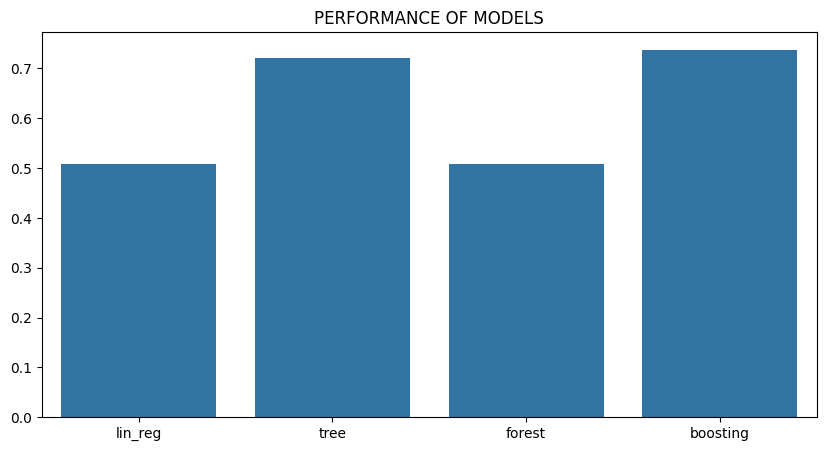

In [ ]:
# plotting the performance of models
plt.figure(figsize=(10,5))
keys = list(models.keys())
values = list(models.values())
sns.barplot(x = keys, y = values)
plt.title('PERFORMANCE OF MODELS')
plt.show()

## **PREDICTION ON TEST DATASET**

In [ ]:
# fitting boosting to the whole training dataset
boosting.fit(train_data, y)

#prediction on testing dataset
y_pred = boosting.predict(test_data)